In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.constants as const
import matplotlib as mpl

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [3]:
def power_law(x, a, m_min, m_max):
    return np.heaviside(m_max - x, 1)*np.heaviside(x - m_min, 1)*x**(-a)/(m_max**(1-a) - m_min**(1-a))*(1-a)


def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))/np.sqrt(2*np.pi)/sigma


def smooth(x, m_min, dm):
    
    try:
        new_x = x[:]
        new_x[new_x == m_min] = m_min + 1e-3
        new_x[new_x == m_min + dm] = m_min + dm + 1e-3
    except:
        if x == m_min:
            new_x = m_min + 1e-3
        elif x == m_min + dm:
            new_x = m_min + dm + 1e-3
        else:
            new_x = x
    f = np.exp(dm/(new_x - m_min) + dm/(new_x - m_min - dm))
    
    #f = np.exp(dm/(x - m_min) + dm/(x - m_min - dm))
    return np.heaviside(x - m_min, 0)*np.heaviside(m_min + dm - x, 0)/(f + 1) + np.heaviside(x - m_min - dm, 1)
    

def ligo(x, a = 2.63, m_min = 4.59, m_max = 86.22, frac = 0.1,
         dm = 4.82, mu = 33.07, sigma = 5.69):
    return ((1 - frac)*power_law(x, a, m_min, m_max) + frac*gaussian(x, mu, sigma))*smooth(x, m_min, dm)

def ligo_m(x, a = 2.63, m_min = 4.59, m_max = 86.22, frac = 0.1,
         dm = 4.82, mu = 33.07, sigma = 5.69):
    return x*ligo(x, a, m_min, m_max, frac, dm, mu, sigma)

In [4]:
m_ar = np.arange(4, 100, .01)

In [5]:
norm = integrate.quad(ligo, 4.59, 86.22)[0]

<ipython-input-3-40ada0f588bc>:22: RuntimeWarning: overflow encountered in exp
  f = np.exp(dm/(new_x - m_min) + dm/(new_x - m_min - dm))


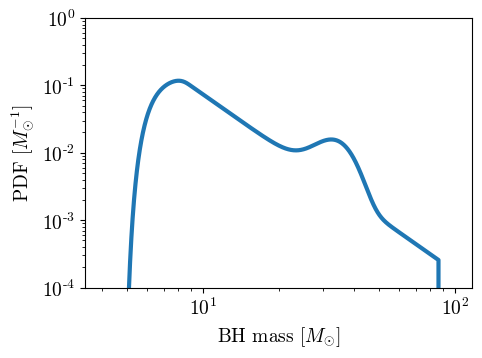

In [6]:
figure = plt.figure(figsize = (5, 3.5))
plt.plot(m_ar, ligo(m_ar)/norm, label = 'LIGO', lw = 3)
#plt.plot(bh_mass[0], bh_mass[1]/hist_norm, label = 'synthetic catalog')
#plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 1e-0)
#plt.xlim(0,90)
plt.xlabel(r'BH mass [$M_{\odot}$]')
plt.ylabel(r'PDF [$M_{\odot}^{-1}$]')
#ax2.set_ylabel(r'PDF ($M_{\odot}^{-1}$)')
#plt.tight_layout()
plt.savefig('BH_mass.pdf', bbox_inches = 'tight')